In [50]:
import math
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

%matplotlib inline

#path = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv'
df = pd.read_excel("table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls", header=None, skiprows=5)


In [51]:
df.columns = ['City', 'Population', 'Violent', 'Murder', 'Rape_def1', 'Rape_def2', 'Robbery', 'Aggravated'
              , 'Property_crime', 'Burglary', 'Larceny', 'Motor_vehicle_teft', 'Arson']

In [52]:
# drop Rape_def1 as it contains no information, almost half of Arson variable is nan as well
df = df.drop('Rape_def1', axis=1)
df = df.drop('Arson', axis=1)

In [53]:
df = df.dropna()

In [54]:
# Change Robbery and Murder to categorical variables 
df['Robbery'] = (df['Robbery'] > 0).astype(int)
df['Murder'] = (df['Murder'] > 0).astype(int)

In [55]:
df['Population_sq'] = (df['Population'] * df['Population'])

In [56]:
df.head()

,City,Population,Violent,Murder,Rape_def2,Robbery,Aggravated,Property_crime,Burglary,Larceny,Motor_vehicle_teft,Population_sq
0,Adams Village,1861.0,0.0,0,0.0,0,0.0,12.0,2.0,10.0,0.0,3.463321e+06
1,Addison Town and Village,2577.0,3.0,0,0.0,0,3.0,24.0,3.0,20.0,1.0,6.640929e+06
2,Akron Village,2846.0,3.0,0,0.0,0,3.0,16.0,1.0,15.0,0.0,8.099716e+06
3,Albany,97956.0,791.0,1,30.0,1,526.0,4090.0,705.0,3243.0,142.0,9.595378e+09
4,Albion Village,6388.0,23.0,0,3.0,1,16.0,223.0,53.0,165.0,5.0,4.080654e+07


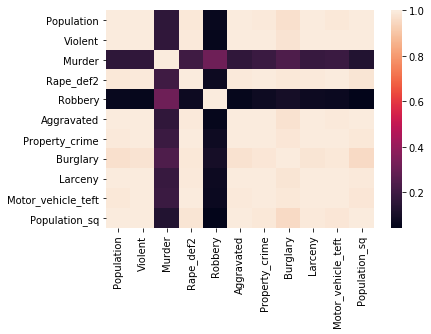

In [68]:
sns.heatmap(df.corr())

In [35]:
# Load and prepare the second data set (crime rate in New York state in other year(2014)) 
df_14 = pd.read_excel("Table_8_Offenses_Known_to_Law_Enforcement_by_New_York_by_City_2014.xls", header=None, skiprows=5)


In [36]:
df_14.columns = ['City', 'Population', 'Violent', 'Murder', 'Rape_def1', 'Rape_def2', 'Robbery', 'Aggravated'
              , 'Property_crime', 'Burglary', 'Larceny', 'Motor_vehicle_teft', 'Arson']

In [37]:
# More cleanup and prep as the 2013 data set
df_14['Robbery'] = (df_14['Robbery'] > 0).astype(int)
df_14['Murder'] = (df_14['Murder'] > 0).astype(int)
df_14['Population_sq'] = (df_14['Population'] * df_14['Population'])

In [38]:
df_14.shape

(376, 14)

In [39]:
df_14.head()

,City,Population,Violent,Murder,Rape_def1,Rape_def2,Robbery,Aggravated,Property_crime,Burglary,Larceny,Motor_vehicle_teft,Arson,Population_sq
0,Adams Village,1851.0,0.0,0,NaN,0.0,0,0.0,11.0,1.0,10.0,0.0,0.0,3.426201e+06
1,Addison Town and Village,2568.0,2.0,0,NaN,0.0,1,1.0,49.0,1.0,47.0,1.0,0.0,6.594624e+06
2,Afton Village4,820.0,0.0,0,0.0,NaN,0,0.0,1.0,0.0,1.0,0.0,0.0,6.724000e+05
3,Akron Village,2842.0,1.0,0,NaN,0.0,0,1.0,17.0,0.0,17.0,0.0,0.0,8.076964e+06
4,Albany4,98595.0,802.0,1,54.0,NaN,1,503.0,3888.0,683.0,3083.0,122.0,12.0,9.720974e+09


In [40]:
df_14.isnull().sum()

City                    1
Population              7
Violent                 7
Murder                  0
Rape_def1             149
Rape_def2             234
Robbery                 0
Aggravated              7
Property_crime          8
Burglary                7
Larceny                 8
Motor_vehicle_teft      7
Arson                  11
Population_sq           7
dtype: int64

In [58]:
# model formula
linear_formula = 'Property_crime ~ Population+Violent+Murder+Rape_def2+Robbery+Burglary'

# fit model to data using the formula 
lm = smf.ols(formula=linear_formula, data=df).fit()

In [78]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         Property_crime   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.373e+05
Date:                Sun, 29 Jul 2018   Prob (F-statistic):               0.00
Time:                        18:13:45   Log-Likelihood:                -2250.2
No. Observations:                 348   AIC:                             4514.
Df Residuals:                     341   BIC:                             4541.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -31.4454     13.596     -2.313      0.0

In [79]:
print('P-values for Murder, Rape_def2, and Robbery are greater than .05')


P-values for Murder, Rape_def2, and Robbery are greater than .05


In [ ]:
# 2014 data set 

In [73]:
# model formula
linear_formula = 'Property_crime ~ Population+Violent+Murder+Rape_def2+Robbery+Burglary'

# fit model to data using the formula 
lm_14 = smf.ols(formula=linear_formula, data=df_14).fit()

In [80]:
print(lm_14.summary())

                            OLS Regression Results                            
Dep. Variable:         Property_crime   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     404.0
Date:                Sun, 29 Jul 2018   Prob (F-statistic):           1.21e-83
Time:                        18:17:50   Log-Likelihood:                -778.34
No. Observations:                 142   AIC:                             1571.
Df Residuals:                     135   BIC:                             1591.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.1697      7.095     -0.729      0.4

Iterate by removing variables with high p values 

In [81]:
linear_formula2 = 'Property_crime ~ Population+Violent+Rape_def2+Burglary'


In [83]:
lm2 = smf.ols(formula=linear_formula2, data=df).fit()

In [84]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:         Property_crime   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.047e+05
Date:                Sun, 29 Jul 2018   Prob (F-statistic):               0.00
Time:                        19:04:10   Log-Likelihood:                -2252.3
No. Observations:                 348   AIC:                             4515.
Df Residuals:                     343   BIC:                             4534.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.8698     10.731     -1.665      0.0

In [85]:
lm2 = smf.ols(formula=linear_formula2, data=df_14).fit()

In [86]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:         Property_crime   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     600.2
Date:                Sun, 29 Jul 2018   Prob (F-statistic):           9.48e-86
Time:                        19:48:00   Log-Likelihood:                -779.97
No. Observations:                 142   AIC:                             1570.
Df Residuals:                     137   BIC:                             1585.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9632      6.958     -0.426      0.6

Both models produce a R^2 value of 1.00 for the 2013 data set and p values of .946 and .947 for the 2014 data set 